In [1]:
# Bibliotecas python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re
%matplotlib inline

# Função para calcular moda.
from scipy import stats

# Formatação dos gráficos
from matplotlib.ticker import FuncFormatter
from matplotlib.legend import Legend

import statsmodels.api as sm

/home/joaovictor/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Configurando o tema do gráfico
myrcs = {"axes.titleweight": "bold", "lines.markersize": 9.0, "lines.linewidth": 2.0, "legend.title_fontsize": 13.75}
sns.set (style="whitegrid", font_scale=1.35, rc=myrcs)
sns.set_palette (sns.color_palette (["#b2df8a", "#33a02c", "#cab2d6", "#6a3d9a"]))
sns.set_palette (sns.color_palette (["#b2df8a", "#33a02c", "#fdbf6f", "#ff7f00"]))
sns.set_palette (sns.color_palette ("Paired"))




# Linhas exibidas por padrão nos dataframes
pd.options.display.min_rows = 20

In [3]:
#Configurações
# A1 - com switch HW, não podendo aumentar/diminuir número de switches SW (número máximo de SW = 1)
# A5 - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 5)
# B - sem switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 5)
# D - com switch HW, não podendo aumentar/diminuir número de switches SW (número de SW fixo em 5)
# E - sem switch HW, não podendo aumentar/diminuir número de switches SW (número de SW fixo em 5)

#Nomes das configurações nos gráficos:
# D = (HW = 1; SW = 5); B = (HW = 0; SW = 1-5); A5 = (HW = 1; SW = 1-5); E = (HW = 0; SW = 5)

# Parâmetros que variam nesta simulação
seeds = [1,2]
cargas = ["50hosts", "100hosts", "150hosts"]
experimentos = ["e","b","d","a5","a1"]

# Tempo total de simulação
t_sim = 2000

# Intervalo de confiança
confianca = 99

# Imprimir titulos nos gráficos
titulos = False

# Salvar graficos
salvarGraficos = False

In [4]:
def read_df_saidaStruct ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/ping/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-saidaStruct.log", sep='\s+', index_col=["Cookie"])
                df_sed.append (df)
            df_exp.append(pd.concat (df_sed, keys=seeds))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Load","Experimento","Seed","Cookie"], copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read

def read_df_cache ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/ping/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-traffic-qos-l7-app.log", sep='\s+', index_col=["Teid"])
                df_sed.append (df)
            df_exp.append(pd.concat (df_sed, keys=seeds))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Load","Experimento","Seed","Cookie"], copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read

In [5]:
df_struct = read_df_saidaStruct()
#f = df.loc[(df["InCache"]!=0)]
#df_struct

In [6]:
df_cache = read_df_cache()
#df_cache

In [7]:
df_concatenado = pd.merge(df_struct, df_cache, how='left', on = ['Cookie', 'Load','Experimento', 'Seed'])
df_concatenado.reset_index(inplace=True)
#df_concatenado

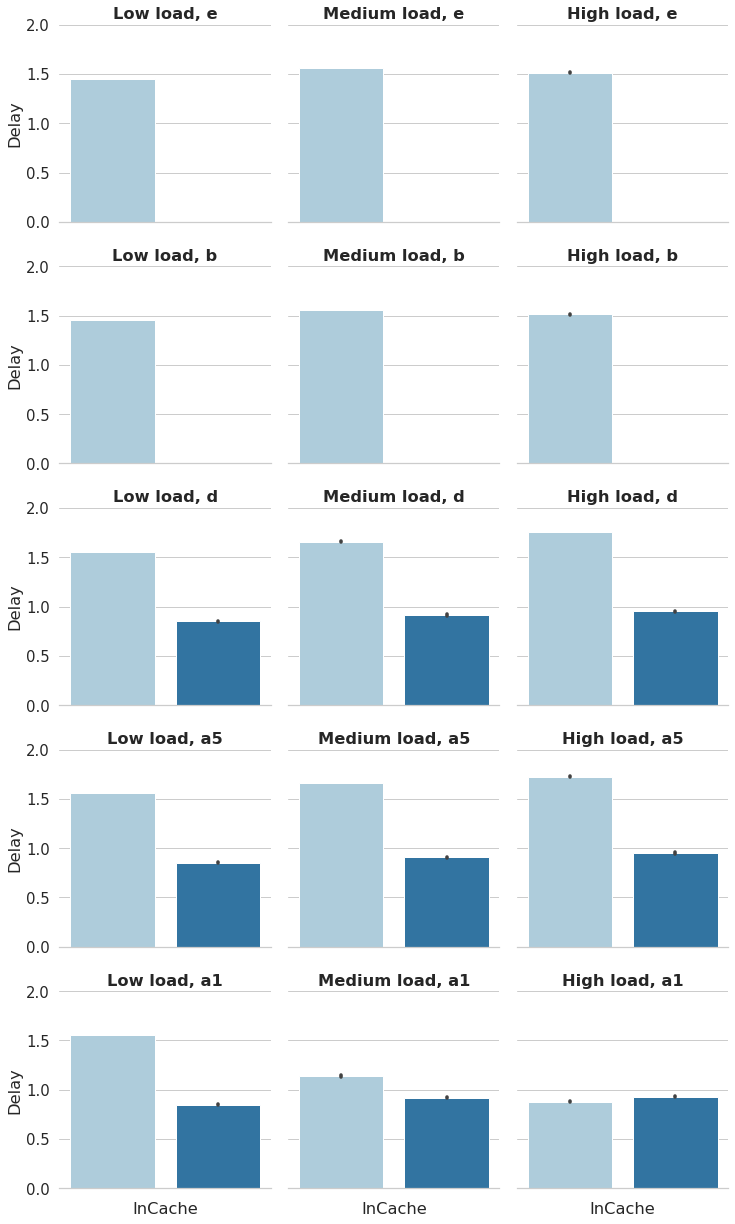

In [8]:
snsplt = sns.catplot( x="InCache", y="Dly:ms", kind="bar",  height=3.5, aspect=1,
                      ci=confianca, data=df_concatenado, row="Experimento" , col="Load",col_order=["Low","Medium","High"])
snsplt.set_titles("{col_name} load, {row_name}")
snsplt.set_axis_labels("InCache", "Delay")
if (titulos):
    snsplt.fig.suptitle('title', y=1.05)
snsplt.set(ylim=(0,2))
snsplt.set_xticklabels(rotation=45, size=12)
#snsplt.fig.set_size_inches(11,4)
snsplt.despine(left=True)
if (salvarGraficos):
    snsplt.savefig("nome.pdf")

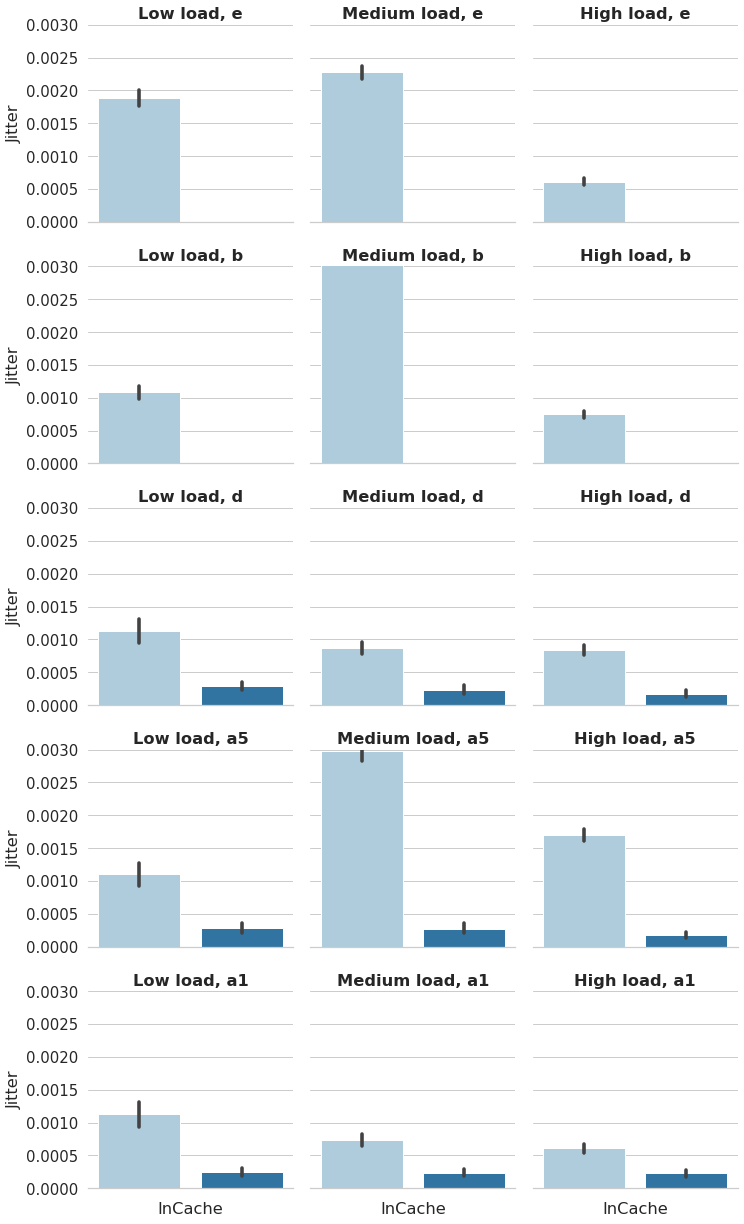

In [9]:
snsplt = sns.catplot( x="InCache", y="Jit:ms", kind="bar",  height=3.5, aspect=1,
                      ci=confianca, data=df_concatenado, row="Experimento" , col="Load",col_order=["Low","Medium","High"])
snsplt.set_titles("{col_name} load, {row_name}")
snsplt.set_axis_labels("InCache", "Jitter")
if (titulos):
    snsplt.fig.suptitle('title', y=1.05)
snsplt.set(ylim=(0,0.003))
snsplt.set_xticklabels(rotation=45, size=12)
#snsplt.fig.set_size_inches(11,4)
snsplt.despine(left=True)
if (salvarGraficos):
    snsplt.savefig("nome.pdf")

In [10]:
seedsPing=[1]

In [11]:
def read_df_pingNaoMovida ():
    df_sed = []
    for seed in seedsPing:
        df = pd.read_csv ("saidas/pingv2/150hosts/seed"+str(seed)+"/a5-150hosts-"+str(seed)+"-Ping-0x0a009f2776759611_0x0a009f2776759611.log", sep='\s+')
        df_sed.append (df)
    df_read = pd.concat (df_sed, copy=False)
    return df_read

In [12]:
def read_df_pingMovida ():
    df_sed = []
    for seed in seedsPing:
        df = pd.read_csv ("saidas/pingv2/150hosts/seed"+str(seed)+"/a5-150hosts-"+str(seed)+"-Ping-0x0ae0ad278a75aa11_0x0ae0ad278a75aa11.log", sep='\s+')
        df_sed.append (df)
    df_read = pd.concat (df_sed, copy=False)
    return df_read

In [13]:
df_naoMovida = read_df_pingNaoMovida()
#df_naoMovida

In [14]:
df_Movida = read_df_pingMovida() #MOVIDA EM 240s
df_Movida = df_Movida.query("Time > 230 and Time < 250")
#df_Movida

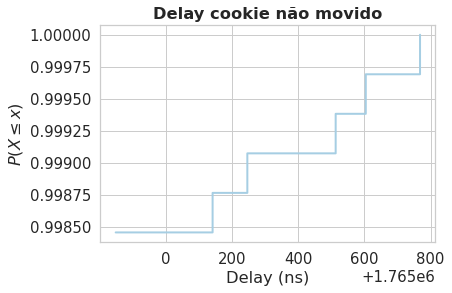

In [15]:
x= np.sort(df_naoMovida["Delay"])
ecdf = sm.distributions.ECDF(df_naoMovida["Delay"])
y = ecdf(x)

plt.title("Delay cookie não movido")
plt.step(x, y, where='post')
plt.ylabel(r'$P(X \leq x)$')
plt.xlabel('Delay (ns)')
plt.show()

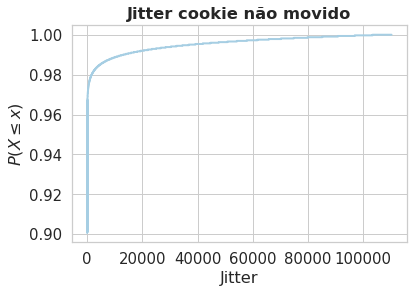

In [16]:
x= df_naoMovida["Jitter"]
ecdf = sm.distributions.ECDF(df_naoMovida["Jitter"])
y = ecdf(x)

plt.title("Jitter cookie não movido")
plt.step(x, y, where='post')
plt.ylabel(r'$P(X \leq x)$')
plt.xlabel('Jitter')
plt.show()

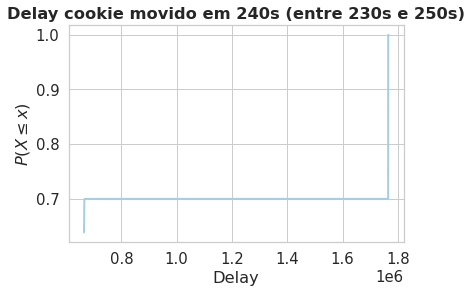

In [17]:
x= np.sort(df_Movida["Delay"])
ecdf = sm.distributions.ECDF(df_Movida["Delay"])
y = ecdf(x)

plt.title("Delay cookie movido em 240s (entre 230s e 250s)")
plt.step(x, y, where='post')
plt.ylabel(r'$P(X \leq x)$')
plt.xlabel('Delay')
plt.show()

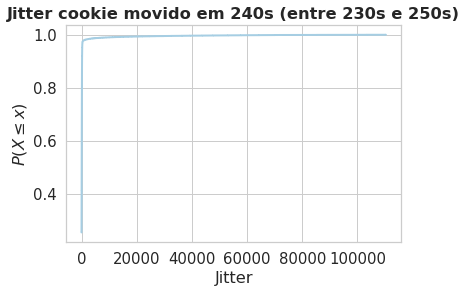

In [18]:
x= np.sort(df_Movida["Jitter"])
ecdf = sm.distributions.ECDF(df_Movida["Jitter"])
y = ecdf(x)

plt.title("Jitter cookie movido em 240s (entre 230s e 250s)")
plt.step(x, y, where='post')
plt.ylabel(r'$P(X \leq x)$')
plt.xlabel('Jitter')
plt.show()